In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from inferential_stats import *
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')
sns.set()

In [4]:
pd.isnull(df).any().sort_values(ascending=False)

FireplaceQu       True
GarageCond        True
BsmtFinType1      True
BsmtExposure      True
BsmtCond          True
BsmtQual          True
Electrical        True
MasVnrArea        True
MasVnrType        True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageQual        True
BsmtFinType2      True
LotFrontage       True
Alley             True
MiscFeature       True
Fence             True
PoolQC            True
LotConfig        False
RoofStyle        False
MSSubClass       False
MSZoning         False
LotArea          False
Foundation       False
ExterCond        False
ExterQual        False
Exterior2nd      False
Exterior1st      False
RoofMatl         False
                 ...  
GarageArea       False
PavedDrive       False
WoodDeckSF       False
OpenPorchSF      False
3SsnPorch        False
BsmtUnfSF        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SaleType         False
Functional 

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
len(df.columns)

81

In [8]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [10]:
len(df)

1460

As a preliminary examination of sale price, lets take a look at its distribution:

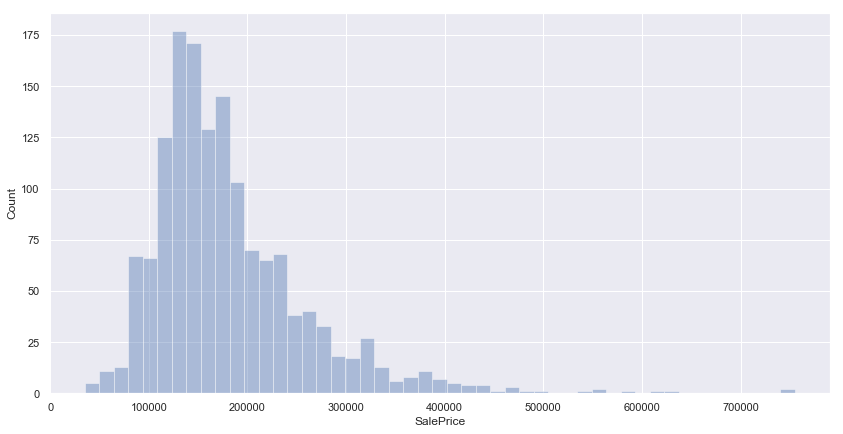

In [11]:
fig, ax = plt.subplots(figsize=(14,7))
sns.distplot(df['SalePrice'], ax=ax, kde=False)
_ = plt.ylabel('Count')

The distribution is clearly skewed to the right, with what look like several outliers. Is this data valid? Could there be a mistake or were these homes truly valued so much higher than the rest of the homes in this dataset.

Lets take a look at what seem to be the most obvious influencers on sales price, square footage and lot size. The goal here is to see if we see a similar distribution to that of sales price. If so, this would indicate perhaps that this skewed sales price distribution might in fact be representative.

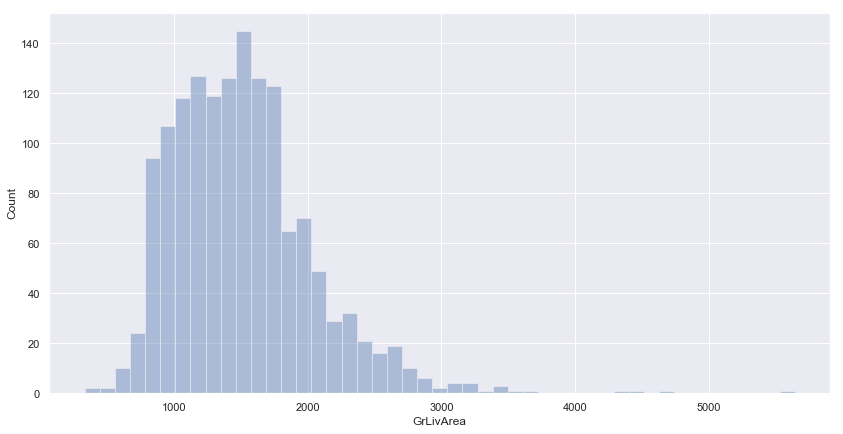

In [12]:
fig, ax = plt.subplots(figsize=(14,7))
sns.distplot(df['GrLivArea'], ax = ax, kde = False)
_ = plt.ylabel('Count')

This is interesting, it looks like the living area (or square footage) also has some outliers and is skewed to the right just like sales price. So these 'outliers' might actually be validated by significantly larger square footage.

The documentation highlights the following:

There are 4 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Two of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). 

Lets take a look at these outliers with respect to sale price:

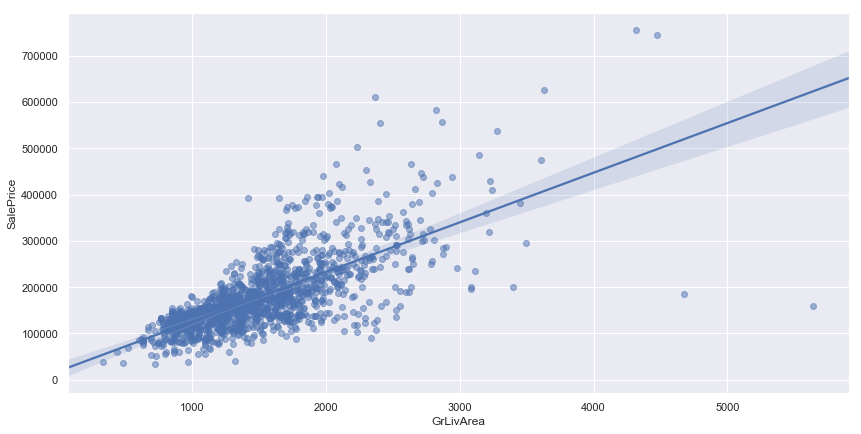

In [13]:
fig, ax = plt.subplots(figsize=(14,7))
_ = sns.regplot(df.GrLivArea, df.SalePrice, ax=ax, scatter_kws={'alpha':0.5})

It becomes obvious by looking at this plot where the outliers in the dataset can be found. Lets isolate these datapoints:

In [14]:
print(df[df['GrLivArea'] > 4000][['SalePrice', 'GrLivArea']])

      SalePrice  GrLivArea
523      184750       4676
691      755000       4316
1182     745000       4476
1298     160000       5642


For now we will leave these outliers in the dataset. For modeling purposes we dont want to assume a perfectly linear relationship so we will reevauluate whether or not to keep these in our dataset based on modeling results. Simply based on this graph it appears the two datapoints below 200,000 sale price could be outliers given there square footage.

Now that we've eliminated the outliers, let's take a look at any missing values which we might benefit from repopulating:

In [15]:
#Calculate a the missing data (per attribute) as a percentage of the total (result is a pandas series)
missing_data = (df.isnull().sum() / len(df)) * 100
missing_data = missing_data.drop(missing_data[missing_data == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame(missing_data)

#Rename the percent missing field
missing_data = missing_data.rename(columns={missing_data.columns[0]:'Percent missing'})

#Prints out the top 20 fields with missing data
print(missing_data.head(20))

              Percent missing
PoolQC              99.520548
MiscFeature         96.301370
Alley               93.767123
Fence               80.753425
FireplaceQu         47.260274
LotFrontage         17.739726
GarageYrBlt          5.547945
GarageType           5.547945
GarageFinish         5.547945
GarageQual           5.547945
GarageCond           5.547945
BsmtFinType2         2.602740
BsmtExposure         2.602740
BsmtFinType1         2.534247
BsmtCond             2.534247
BsmtQual             2.534247
MasVnrArea           0.547945
MasVnrType           0.547945
Electrical           0.068493


Lets take a look at this missing data in a visualization:

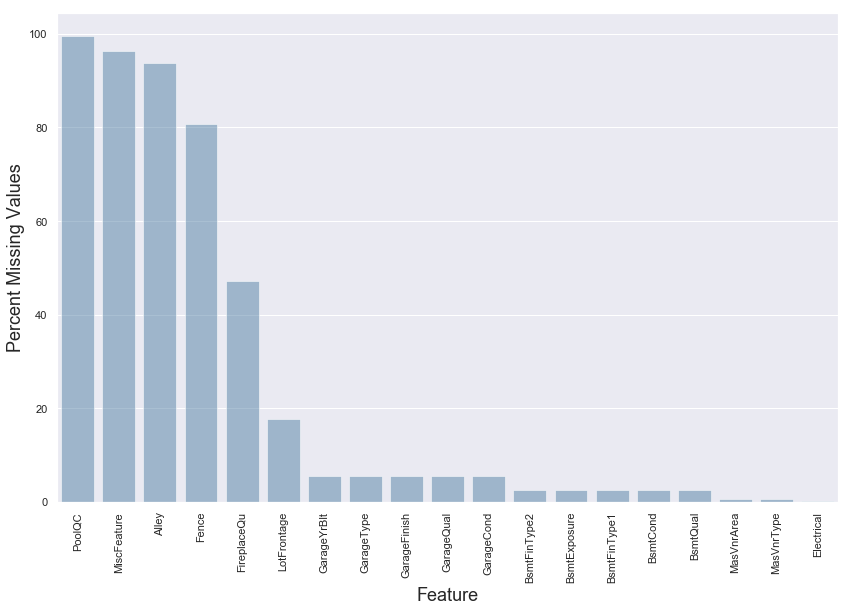

In [16]:
fig, ax = plt.subplots(figsize=(14,9))
plt.xticks(rotation='90')

#Create a barplot showing the missing data per feature as a percent of total data points
sns.barplot(missing_data.index, missing_data['Percent missing'], ax=ax, color='steelblue', alpha=.5)
plt.ylabel('Percent Missing Values', fontsize=18)
_ = plt.xlabel('Feature', fontsize=18)

Lets now attempt to address some of these missing values:

The fields PoolQC, MiscFeature, Alley, Fence and FireplaceQu all have Na values which correspond to absence of that feature. For example Na for PoolQC means the property has no pool. To simplify the data processing here we would like to convert these values to a representative string "None". See below:

In [17]:
df["PoolQC"] = df["PoolQC"].fillna("None")

In [18]:
df['MiscFeature'] = df['MiscFeature'].fillna("None")

In [19]:
df["Alley"] = df["Alley"].fillna("None")

In [20]:
df["Fence"] = df["Fence"].fillna("None")

In [21]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

From the data dictionary, LotFrontage represents the amount of square footage on the street connected to the house. Its highly unlikely that this is 0, so in this case it's most likely just unrecorded data. To treat these values, we will fill in the missing LotFrontage values with the medianLotFrontage.

In [22]:
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

For GarageType, GarageQual and GarageCond we will replace missing data with 'No Garage' as indicated by the data dictionary:

In [23]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('No Garage')

For GarageYrBlt, GarageArea and GarageCars we will replace missing data with 0:

In [24]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

For BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 we can replace the null values with the string "No Basement":

In [25]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('No Basement')

For BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath we will replace missing values with 0 since null values indicate no basement here:

In [26]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)

For MasVnrArea and MasVnrType here null values indicate no veneer applied to the home. So lets fill in 0/None for those as applicable:

In [27]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

For MSZoning, since this is categorical data, lets fill in the missing values with the most common value or the mode of the entries:

In [28]:
mode = df['MSZoning'].mode()[0]
df['MSZoning'] = df['MSZoning'].fillna(mode)

For Functional, or 'Home Functionality' we are told to assume 'typical':

In [29]:
df["Functional"] = df["Functional"].fillna("Typical")

For Electrical we can replace with mode since it is categorical data (and only 1 missing value is present):

In [30]:
mode = df['Electrical'].mode()[0]
df['Electrical'] = df['Electrical'].fillna(mode)

For Exterior1st and Exterior2nd (categorical data) we can replace missing values with the mode as well:

In [31]:
mode1 = df['Exterior1st'].mode()[0]
df['Exterior1st'] = df['Exterior1st'].fillna(mode1)

mode2 = df['Exterior2nd'].mode()[0]
df['Exterior2nd'] = df['Exterior2nd'].fillna(mode2)

Finally for MSSubClass we can replace null values with "No Building Class" as suggested by the data dictionary:

In [32]:
df['MSSubClass'] = df['MSSubClass'].fillna("No Building Class")

Now lets check to make sure we have eliminated all of the missing values:

In [33]:
missing_data = (df.isnull().sum() / len(df)) * 100
missing_data = missing_data.drop(missing_data[missing_data == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :missing_data})
missing_data.head()

,Missing Ratio


Now lets take a look at the corellations between numerical types. Float64 and int64 datatypes can be used in this evaluation.

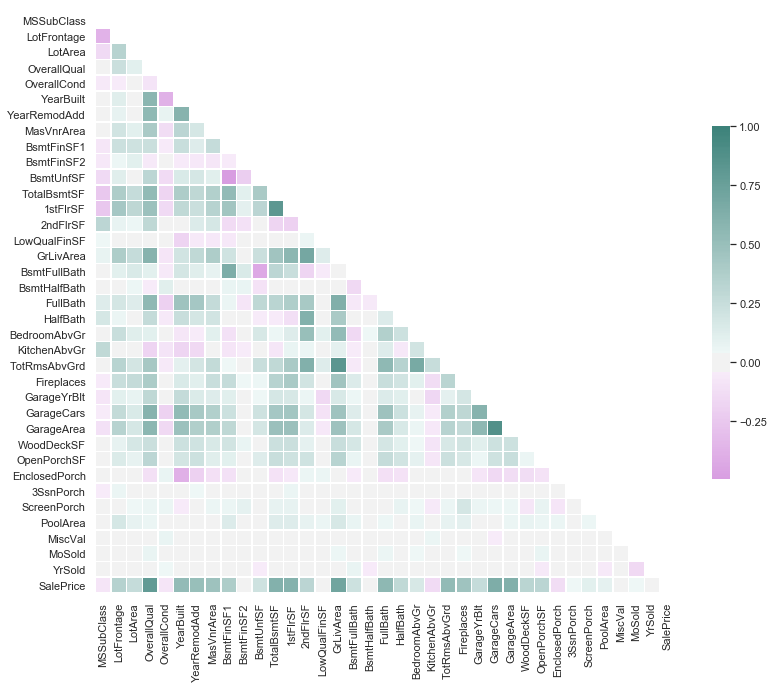

In [34]:
corr = df.select_dtypes(include=['float64', 'int64']).iloc[:,1:].corr()

sns.set_style("whitegrid", {'axes.grid' : False})

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(300, 180, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [35]:
sns.set()

In [36]:
cor_dict=corr['SalePrice'].to_dict()
del cor_dict['SalePrice']

output = [
    print("{0}: \t{1}".format(*entry))
    for entry in sorted(cor_dict.items(), key = lambda x: x[1], reverse=True)
]

OverallQual: 	0.7909816005838047
GrLivArea: 	0.7086244776126511
GarageCars: 	0.640409197258349
GarageArea: 	0.6234314389183598
TotalBsmtSF: 	0.6135805515591944
1stFlrSF: 	0.6058521846919166
FullBath: 	0.5606637627484452
TotRmsAbvGrd: 	0.5337231555820238
YearBuilt: 	0.5228973328794967
YearRemodAdd: 	0.5071009671113867
MasVnrArea: 	0.47261449900457725
Fireplaces: 	0.4669288367515242
BsmtFinSF1: 	0.38641980624215627
LotFrontage: 	0.3498756103224416
WoodDeckSF: 	0.32441344456813076
2ndFlrSF: 	0.31933380283206614
OpenPorchSF: 	0.31585622711605577
HalfBath: 	0.2841076755947784
LotArea: 	0.2638433538714063
GarageYrBlt: 	0.2613664351029631
BsmtFullBath: 	0.22712223313149718
BsmtUnfSF: 	0.214479105546969
BedroomAbvGr: 	0.1682131543007415
ScreenPorch: 	0.11144657114291048
PoolArea: 	0.09240354949187278
MoSold: 	0.04643224522381936
3SsnPorch: 	0.04458366533574792
BsmtFinSF2: 	-0.011378121450215216
BsmtHalfBath: 	-0.016844154297359294
MiscVal: 	-0.02118957964030379
LowQualFinSF: 	-0.02560613000068

In [37]:
corr_pearson = df.select_dtypes(include=['float64', 'int64']).iloc[:,1:].corr(method='pearson')
cor_dict_pearson=corr_pearson['SalePrice'].to_dict()
del cor_dict_pearson['SalePrice']

output = [
    print("{0}: \t{1}".format(*entry)) 
    for entry in sorted(cor_dict_pearson.items(), key = lambda x: x[1], reverse=True)
]

OverallQual: 	0.7909816005838047
GrLivArea: 	0.7086244776126511
GarageCars: 	0.640409197258349
GarageArea: 	0.6234314389183598
TotalBsmtSF: 	0.6135805515591944
1stFlrSF: 	0.6058521846919166
FullBath: 	0.5606637627484452
TotRmsAbvGrd: 	0.5337231555820238
YearBuilt: 	0.5228973328794967
YearRemodAdd: 	0.5071009671113867
MasVnrArea: 	0.47261449900457725
Fireplaces: 	0.4669288367515242
BsmtFinSF1: 	0.38641980624215627
LotFrontage: 	0.3498756103224416
WoodDeckSF: 	0.32441344456813076
2ndFlrSF: 	0.31933380283206614
OpenPorchSF: 	0.31585622711605577
HalfBath: 	0.2841076755947784
LotArea: 	0.2638433538714063
GarageYrBlt: 	0.2613664351029631
BsmtFullBath: 	0.22712223313149718
BsmtUnfSF: 	0.214479105546969
BedroomAbvGr: 	0.1682131543007415
ScreenPorch: 	0.11144657114291048
PoolArea: 	0.09240354949187278
MoSold: 	0.04643224522381936
3SsnPorch: 	0.04458366533574792
BsmtFinSF2: 	-0.011378121450215216
BsmtHalfBath: 	-0.016844154297359294
MiscVal: 	-0.02118957964030379
LowQualFinSF: 	-0.02560613000068

In [38]:
output = [
    print(k1, abs(v1-v2)) 
    for (k1,v1), (k2,v2) in zip(cor_dict.items(), cor_dict_pearson.items())
]

MSSubClass 0.0
LotFrontage 0.0
LotArea 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
MasVnrArea 0.0
BsmtFinSF1 0.0
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
TotRmsAbvGrd 0.0
Fireplaces 0.0
GarageYrBlt 0.0
GarageCars 0.0
GarageArea 0.0
WoodDeckSF 0.0
OpenPorchSF 0.0
EnclosedPorch 0.0
3SsnPorch 0.0
ScreenPorch 0.0
PoolArea 0.0
MiscVal 0.0
MoSold 0.0
YrSold 0.0


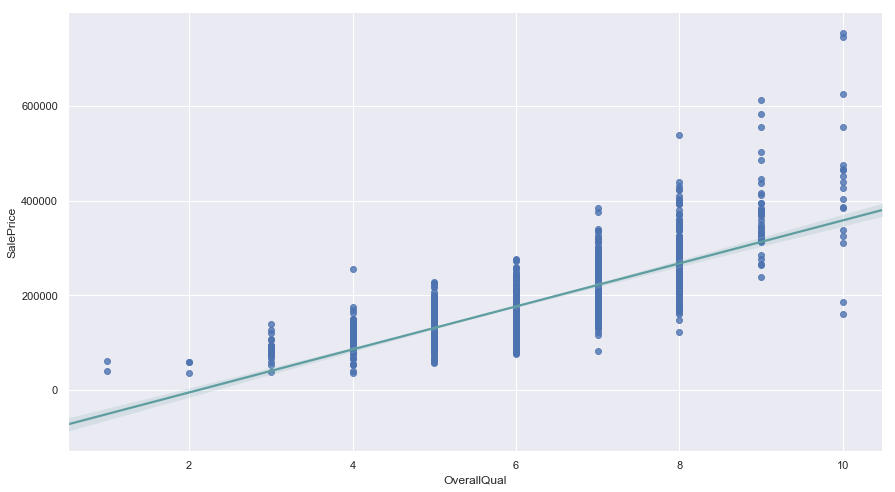

In [39]:
sns.lmplot(x='OverallQual', y='SalePrice', data=df, fit_reg=True, line_kws={'color': 'cadetblue'}, height=7, aspect=1.8)

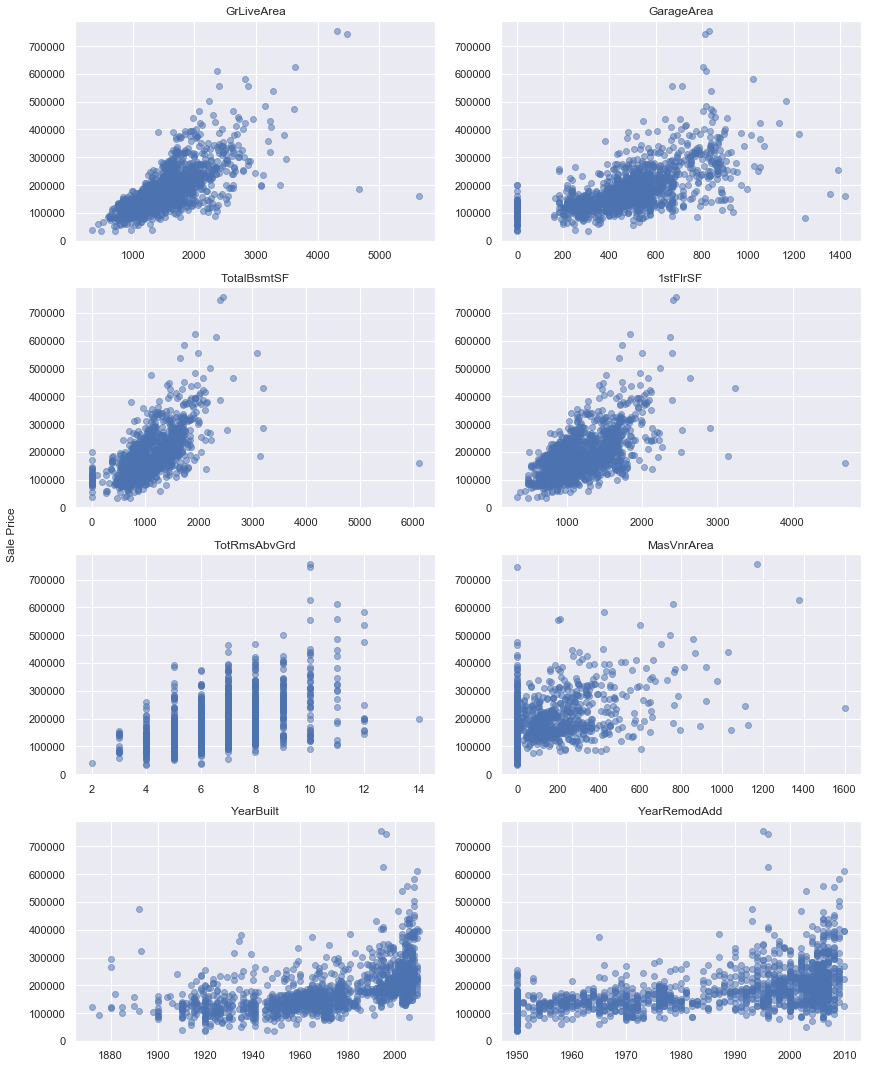

In [40]:

f, axarr = plt.subplots(4, 2, figsize=(12, 15))
price = df.SalePrice.values
axarr[0, 0].scatter(df.GrLivArea.values, price, alpha=.5)
axarr[0, 0].set_title('GrLiveArea')
axarr[0, 1].scatter(df.GarageArea.values, price, alpha=.5)
axarr[0, 1].set_title('GarageArea')
axarr[1, 0].scatter(df.TotalBsmtSF.values, price, alpha=.5)
axarr[1, 0].set_title('TotalBsmtSF')
axarr[1, 1].scatter(df['1stFlrSF'].values, price, alpha=.5)
axarr[1, 1].set_title('1stFlrSF')
axarr[2, 0].scatter(df.TotRmsAbvGrd.values, price, alpha=.5)
axarr[2, 0].set_title('TotRmsAbvGrd')
axarr[2, 1].scatter(df.MasVnrArea.values, price, alpha=.5)
axarr[2, 1].set_title('MasVnrArea')
axarr[3, 0].scatter(df.YearBuilt.values, price, alpha=.5)
axarr[3, 0].set_title('YearBuilt')
axarr[3, 1].scatter(df.YearRemodAdd.values, price, alpha=.5)
axarr[3, 1].set_title('YearRemodAdd')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

Let's take a look at the distribution of lot area (LotArea):

The biggest lot size is 215,245.00 square feet, the smallest 1,300.00 square feet


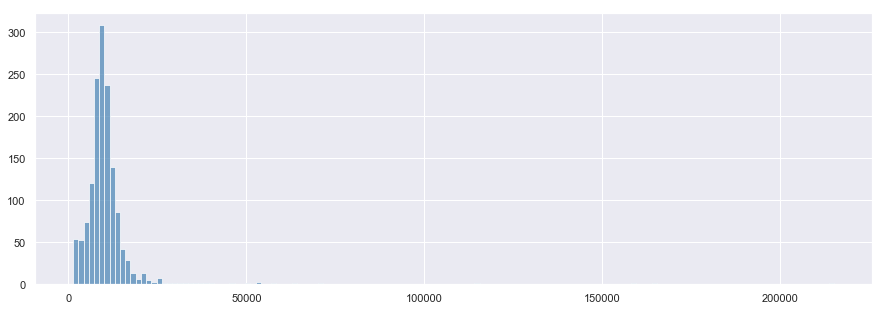

In [41]:
#Calculate the ideal number of bins source: https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram
bins = math.floor((max(df.LotArea) - min(df.LotArea))/len(df.LotArea))

(df.LotArea).hist(bins=bins, rwidth=1, figsize=(15,5), color='steelblue', alpha=.7)

print('The biggest lot size is {:,.2f} square feet, the smallest {:,.2f} square feet'.format(
    df.LotArea.max(), df.LotArea.min()))

Let's place a threshold for lot area and see what this distribution looks like

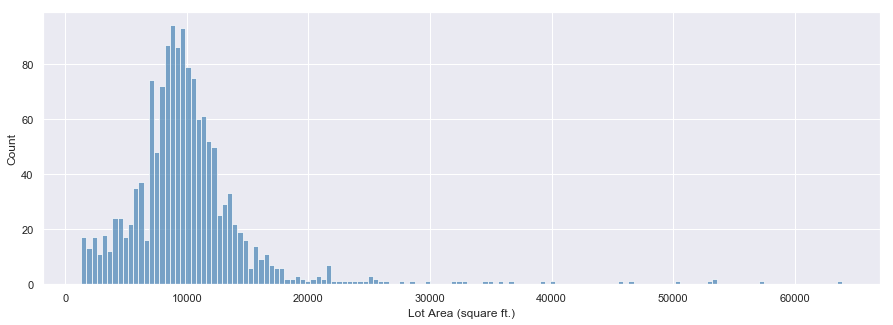

In [42]:
lot_area_filter = df[df['LotArea'] < 70000]

(lot_area_filter.LotArea).hist(bins=bins, rwidth=1, figsize=(15,5), color = 'steelblue', alpha=.7)
plt.xlabel('Lot Area (square ft.)')
_ = plt.ylabel('Count')

We clearly see a very similar skew as observed in the Sale Price distribution plot. Also interesting to note is that there is one extremely large lot 215,245 square feet. 

Lets take a deeper look at the relationship between lot area and sale price

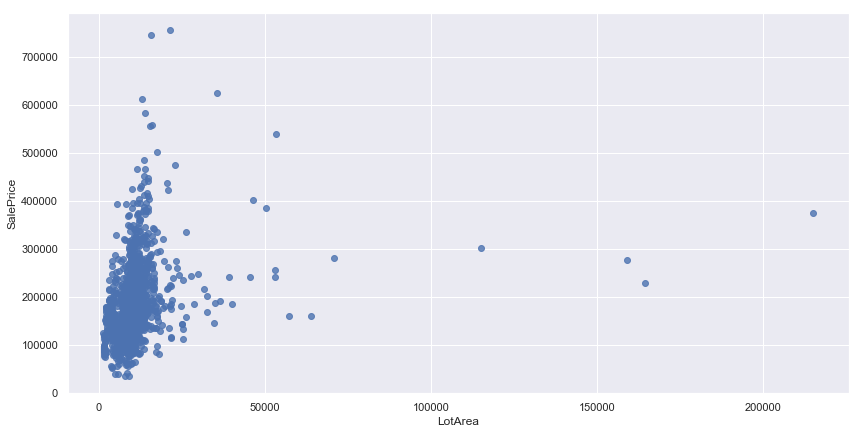

In [43]:
fig, ax = plt.subplots(figsize=(14,7))
_ = sns.regplot(x='LotArea', y='SalePrice', data=df, fit_reg=False, ax=ax)

Its fairly hard to tell so lets filter this down a bit since there seem to be many outliers with respect to lot area:

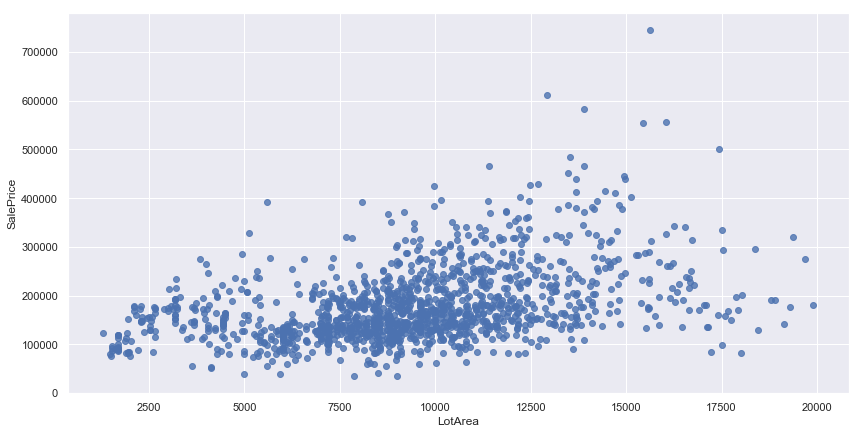

In [44]:
df_lot_area = df[df['LotArea'] < 20000]
fig, ax = plt.subplots(figsize=(14,7))
_ = sns.regplot(x='LotArea', y='SalePrice', data=df_lot_area, fit_reg=False, ax=ax)

There seems to be some relationship here, but its hard to tell and the salesprices seem to range widely for any given lot area. Given this i think we need to move on to other possibly more influential features.

Another interesting hypothesis to investigate would be the influence on time of sale or year sold on the sales price of a home.  Lets take a  look at the distribution of home sales by year sold:

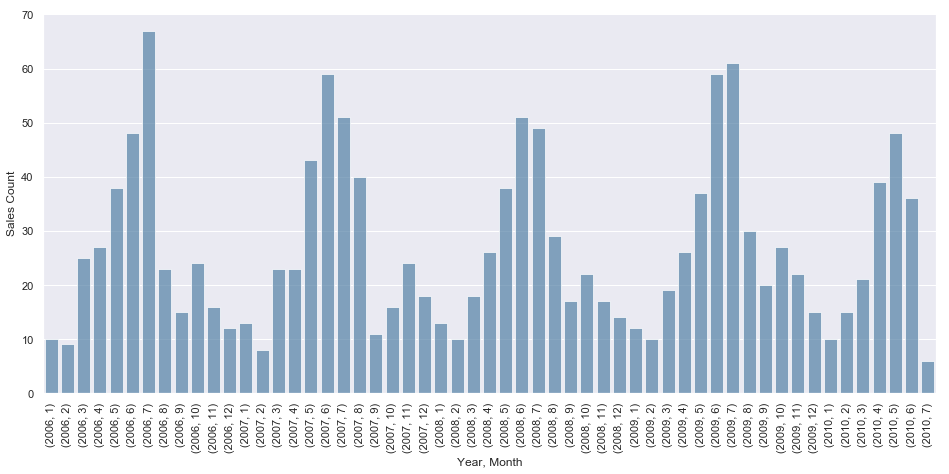

In [45]:
sales_by_year_month = df.groupby(['YrSold','MoSold']).size()# .plot(kind='bar', figsize=(14,4))
df_sales_by_year_month = pd.DataFrame(sales_by_year_month)
df_sales_by_year_month = df_sales_by_year_month.rename(columns={df_sales_by_year_month.columns[0]:'NumberOfSales'})

fig, ax = plt.subplots(figsize=(16,7))
sales_plot = sns.barplot(df_sales_by_year_month.index, df_sales_by_year_month.NumberOfSales, data = df_sales_by_year_month, ax=ax, 
                         color = 'steelblue', alpha=.7)
plt.xlabel("Year, Month")
plt.ylabel("Sales Count")
_= sales_plot.set_xticklabels(sales_plot.get_xticklabels(), rotation=90)


This is interesting! We see a very cyclical pattern hear where there is very high sales volume in summer months and very low sales volume during winter. Its almost perfectly consistent from the years 2006-2010 (the entire year range of the dataset). One hypothesis to test here is that this sales volume may effect sales price. For instance in months with very high volume, there is likely less market supply which may drive price up. Lets test this theory:

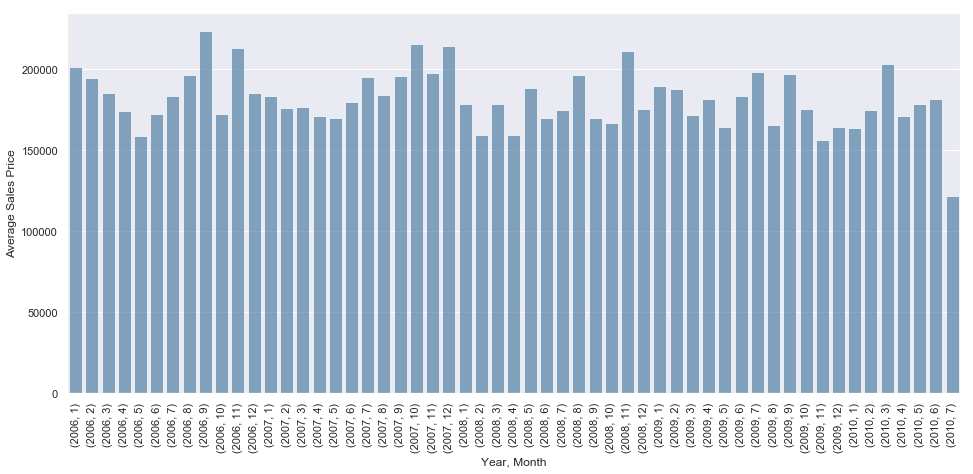

In [46]:
mean_sales_per_month = df.groupby(['YrSold','MoSold'])['SalePrice'].mean()
df_mean_sales_per_month = pd.DataFrame(mean_sales_per_month)


df_mean_sales_per_month = df_mean_sales_per_month.rename(columns={df_mean_sales_per_month.columns[0]:'AverageSales'})


fig, ax = plt.subplots(figsize=(16,7))
sales_mean_plot = sns.barplot(df_mean_sales_per_month.index, df_mean_sales_per_month.AverageSales, data = df_mean_sales_per_month, ax=ax, 
                              color = 'steelblue', alpha=.7)
plt.xlabel("Year, Month")
plt.ylabel("Average Sales Price")
_= sales_mean_plot.set_xticklabels(sales_plot.get_xticklabels(), rotation=90)

From this result there seems to be a trend, but not nearly as drastic as we would have expected based on the sales volume chart. The hypothesis seems somewhat true but hard to prove that just from this visualization. 

Yet another hypothesis to test is that square footage will ultimately drive sales price. It is quite intuitive to suggest that the larger a home, the higher its value. We see that there seems to be a linear relationship between GrLivArea, TotalBsmtSF and GarageArea. Lets do some feature engineering here to further test this hypothesis: 

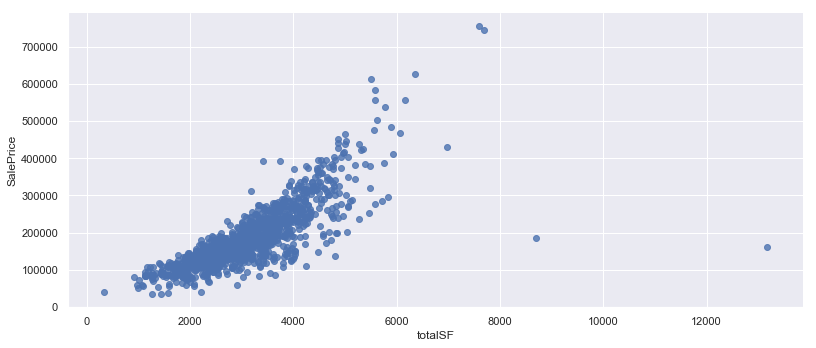

In [47]:
df['totalSF'] = df['GrLivArea'] + df['TotalBsmtSF'] + df['GarageArea']

_ = sns.lmplot('totalSF', 'SalePrice', data=df, height=5, aspect=2.3, fit_reg = False)

Now we are on to something here. It really seems like there is a linear or almost exponential relationship between the total square footage of a home and the final sales price

Lets now examine the pearson corellation coefficients observed for totalSF and OverallQual in order to determine if there is any difference in their corellation with respect to SalePrice. From earlier results it was observed that OverallQual v Saleprice had a coefficient of .79, while totalSF and SalePrice had one of .8.

In [48]:
totalSF_pearson = stats.pearsonr(df['totalSF'],df['SalePrice'])
OverallQual_pearson = stats.pearsonr(df['OverallQual'], df['SalePrice'])

print('totalSF pearson:',totalSF_pearson, ' OverallQual pearson:', OverallQual_pearson)

totalSF pearson: (0.8075184760515013, 0.0)  OverallQual pearson: (0.7909816005838051, 2.185675268e-313)


So looking at the p-values for each of these tests we see that they are essentially 0 meaning a very high confidence that this corellation calculated is true.

Lets perform a bootstrap test to evaluate the probability of a value as high as .8 emerging in the distribution of pearson values for OverallQual. The following is the hypothesis we will refer to:


Ho: The Pearson coefficients of OverallQual and totalSF are equal

Ha: The totalSF parameter has a greater correlation to SalePrice

𝞪: .05


In [50]:
np.random.seed(42)
qual = draw_bs_reps([df['OverallQual'],df['SalePrice']], pearson_r, bootstrap_replicate_2d, 10000)
p = (np.sum(qual >= .8075185)/len(qual))
print(p)

0.05


In [51]:
np.random.seed(42)
totalSF = draw_bs_reps([df['totalSF'],df['SalePrice']], pearson_r, bootstrap_replicate_2d, 10000)
p = (np.sum(totalSF <= .7909816005838051)/len(totalSF))
print(p)

0.2886


In [52]:
stats.pearsonr(df['OverallQual'],df['SalePrice'])

(0.7909816005838051, 2.185675268e-313)

Given this percentile of .05 we would normally accept the null hypothesis, even though the value is on the threshold (not enough evidence to reject in this case).

Lets take a look at the relationship between year built ('YearBuilt') and sale price ('SalePrice'). The expectation is that the newer the home the more it will sell for. Lets test this hypothesis:

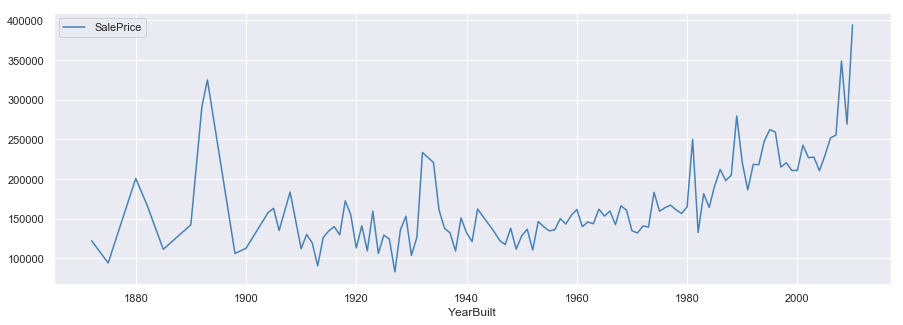

In [70]:
df_years = df[['YearBuilt', 'SalePrice']]
_ = df_years.groupby(['YearBuilt']).mean().plot(figsize=(15,5), color='steelblue')

The resultant graph shows that there is an observable trend. Whats interesting to note is that there is a spike in value between 1890 to 1900. Perhaps this is due to some desirable architectural style which dominated that particular period. This may be worth looking into in the future.

Lets examine if a similar relationhip can be seen with the year a remodel was added to the home (YearRemodAdd):

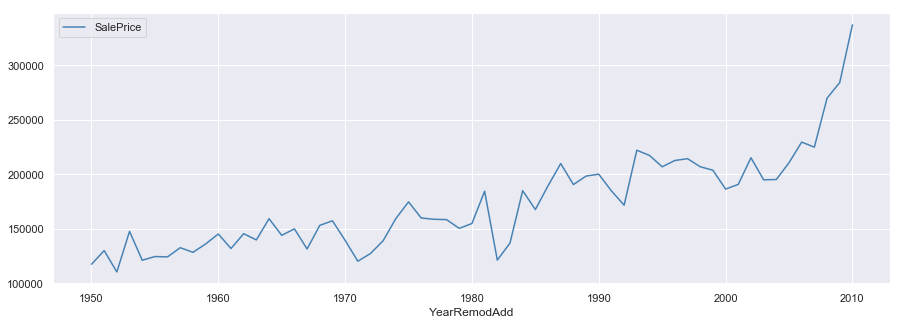

In [71]:
df_years = df[['YearRemodAdd', 'SalePrice']]
_ = df_years.groupby(['YearRemodAdd']).mean().plot(figsize=(15,5), color='steelblue')

A similar trend exists with respect to year built. Looks to be almost linear or exponential with respect to sales price. This is somewhat intuitive. Remodeling a home will always add value and the later its remodeled the more valuable this enhancement becomes.

The next hypothesis to test will be location. Since when it comes to property, they always say 'location, location, location!'. Lets take a look at how sales price varies based on location in Ames Iowa.

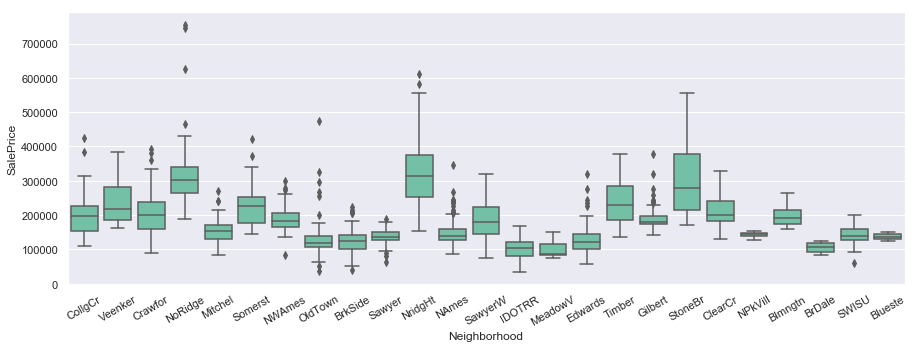

In [72]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, color='mediumaquamarine')
xt= plt.xticks(rotation=30)

Its a quite interesting result. Seems that there is a lot of variance between the boxplots here which indicates that the neighborhood truly matters in determining sale price. We can say that this hypothesis is validated by this result.

Lets look at mean sales price by neighborhood:

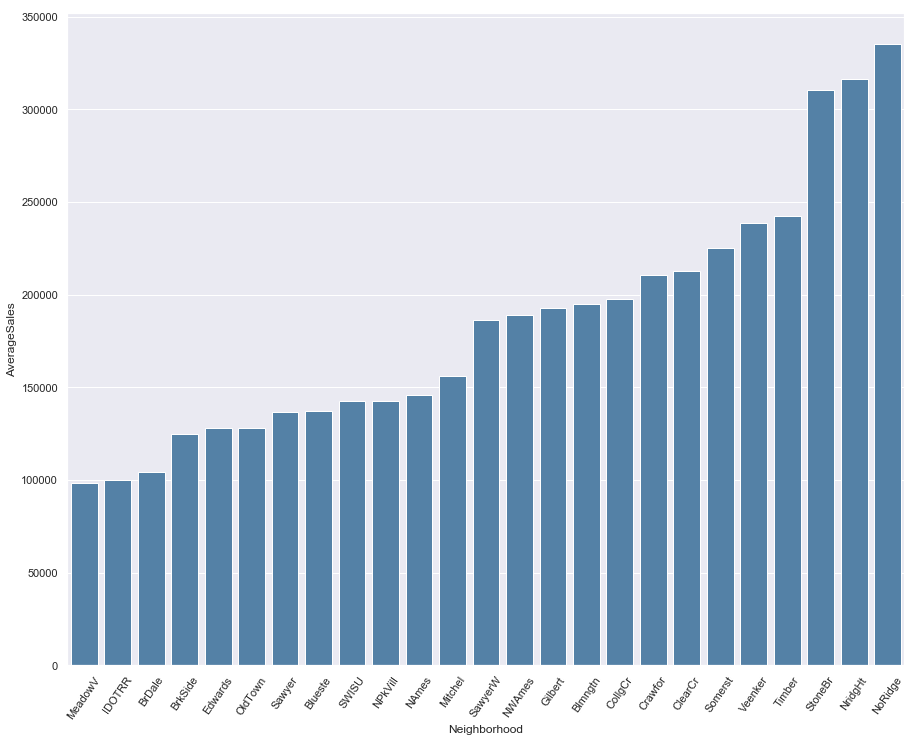

In [121]:
fig, ax = plt.subplots(1, 1, figsize = (15, 12))
df_Neighborhood = df.groupby(['Neighborhood'])['SalePrice'].mean()
df_Neighborhood = pd.DataFrame(df_Neighborhood)
df_Neighborhood = df_Neighborhood.rename(columns={df_Neighborhood.columns[0]:'AverageSales'})
df_Neighborhood = df_Neighborhood.sort_values(by='AverageSales')
x = plt.xticks(rotation = 55)
_ = sns.barplot(df_Neighborhood.index, df_Neighborhood.AverageSales, data = df_Neighborhood, ax=ax, color = 'steelblue')



Seems like there are three neighborhoods with average sales significantly higher than the rest. Lets test statistical significance between neighborhoods. For this test we will look at the lowest average sales 'MeadowV' vs 'Timber' (the neighborhood with highest average sales excluding the 3 potential outliers StoneBr, NridgeHt, NoRidge). 

**Lets create the following frequentest style hypothesis test:**

**Ho** = There is no difference between mean of MeadowV and Timber home sale prices. 

**Ha** = The means are not equal (two tailed test)

**Alpha** = Lets use an alpha value of .05 or 5%

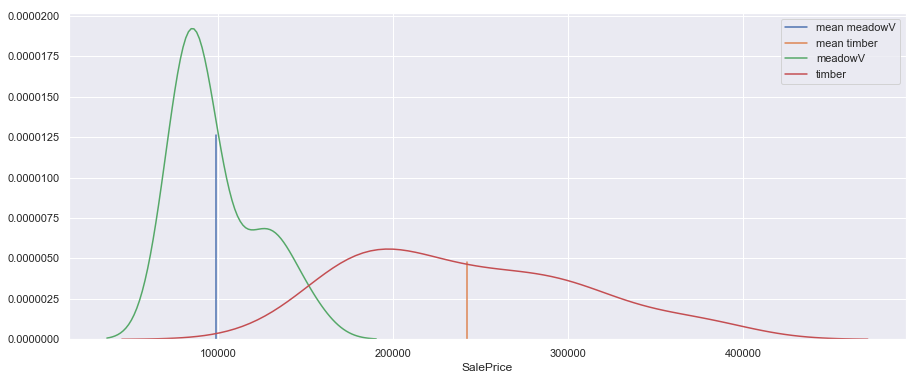

In [122]:
#Filter data for each neighborhood

meadowV = df[df['Neighborhood'] == 'MeadowV']['SalePrice']
timber = df[df['Neighborhood'] == 'Timber']['SalePrice']

#Calculate summary statistics

mean_meadowV = meadowV.mean()
mean_timber = timber.mean()

std_meadowV = np.std(meadowV)
std_timber = np.std(timber)

#Plot distributions to create a visualization
plt.figure(figsize=(15, 6))

plt.plot([mean_meadowV, mean_meadowV],[0.0,.0000126], label="mean meadowV")
plt.plot([mean_timber, mean_timber],[0.0,.0000048], label="mean timber")
sns.distplot(meadowV, hist=False, label="meadowV")
_ = sns.distplot(timber, hist=False, label="timber")


Seems the distributions vary significantly from each other. Lets confirm this with the z-test

In [123]:
#Calculate the standard dev for the distributions
sigma = np.sqrt((std_meadowV**2)/len(meadowV) + (std_timber**2)/len(timber))
sigma

11759.927357269155

In [124]:
#Calculate the z value
diff_of_means = mean_meadowV - mean_timber

z = (diff_of_means - 0)/(sigma)

print('z-value:', z)

z-value: -12.2169952598711


In [125]:
p_val_from_z = stats.norm.cdf(z)*2

print('p-value: ', p_val_from_z)

p-value:  2.5223623931987262e-34


So given this p-value its very clear that we can reject the null hypothesis and assert that the difference in means between neighborhoods is statistically significant. What about other neighborhoods? Lets consider all neighborhoods and evaluate statistical significance for each against the others.

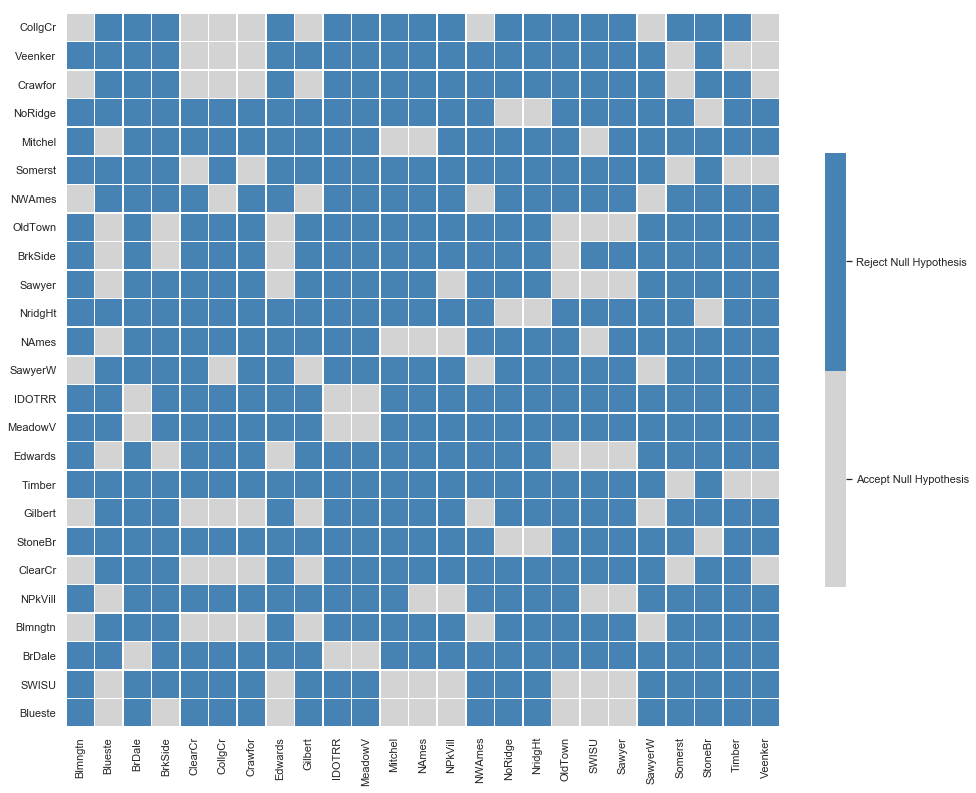

In [75]:

items = get_data_to_compare(list(df['Neighborhood'].unique()))
dfnew = pd.DataFrame(index=list(df['Neighborhood'].unique()))

all_stats = [calculate_p_for_mean_diff(item[0],item[1],.05,df, 'SalePrice', 'Neighborhood') for item in items]

#Need to restructure the result from the statistics tests into a dict in order to convert this to a dataframe
data_dict = {}
for idx in dfnew.index:
    data_list = []  
    for col in dfnew.index:
        for stat in all_stats:
            if col in stat and idx in stat:
                if col == idx:
                    data_list.append(False)
                else:
                    data_list.append(stat[3])
                break
                
    data_dict[idx] = data_list
    
new_df = pd.DataFrame(data_dict)
new_df = new_df.set_index(dfnew.index)


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# # Generate a custom binary colormap
colors = ["lightgrey", "steelblue"] 
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))


# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(new_df, cmap=cmap,square=True,  linewidths=.5, cbar_kws={"shrink": .5})

# Set the colorbar labels
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25,0.75])
colorbar.set_ticklabels(['Accept Null Hypothesis', 'Reject Null Hypothesis'])

In [128]:
np.sum(np.sum(new_df))

494

 We see some neighborhoods where differences can be ignored but for the most part, these differences cant be ignored. In almost all cases we must reject the null hypothesis that the means are the same in favor of the alternate.

Since we have so many p-tests there is quite a large chance that we are introducing some Type I errors. To correct for this we will try  the conservative approach of the Bonferroni correction. This states that when making a large number of statistical comparisons it makes sense to reduce the alpha value. This is done by dividing the alpha used by the number of comparisons being made. In this case we have 25x25 = 625. So then we will use an alpha of .05/625 = .00008

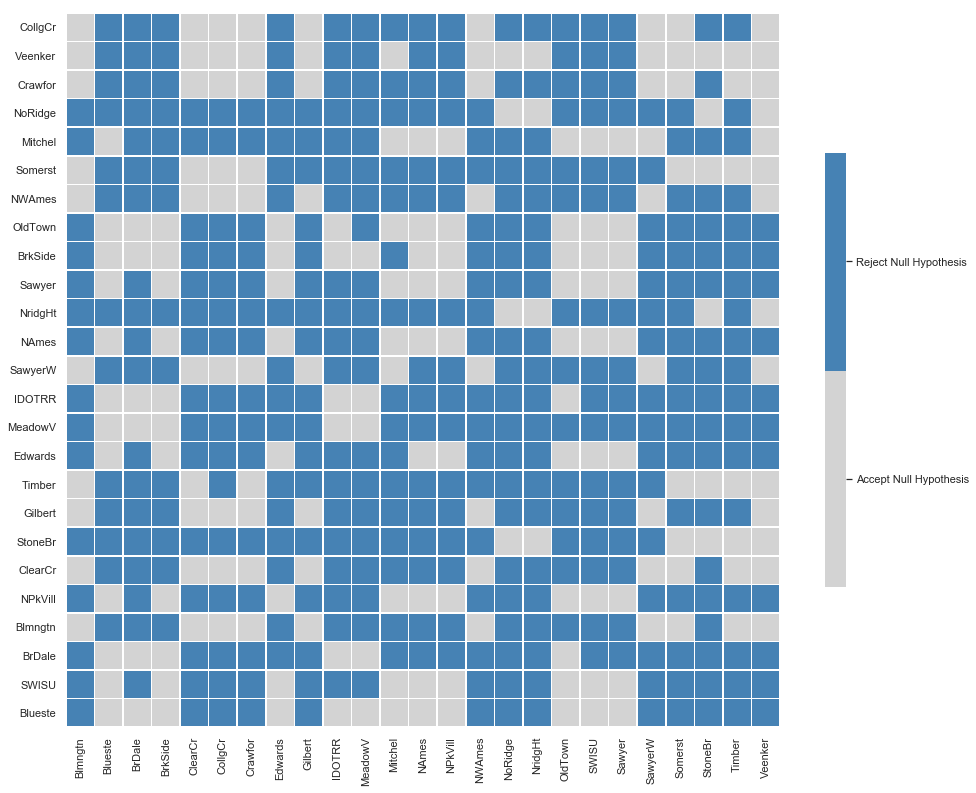

In [73]:
items = get_data_to_compare(list(df['Neighborhood'].unique()))
dfnew = pd.DataFrame(index=list(df['Neighborhood'].unique()))

all_stats = [calculate_p_for_mean_diff(item[0],item[1],.00008,df, 'SalePrice', 'Neighborhood') for item in items]

#Need to restructure the result from the statistics tests into a dict in order to convert this to a dataframe
data_dict = {}
for idx in dfnew.index:
    data_list = []  
    for col in dfnew.index:
        for stat in all_stats:
            if col in stat and idx in stat:
                if col == idx:
                    data_list.append(False)
                else:
                    data_list.append(stat[3])
                break
                
    data_dict[idx] = data_list
    
new_df = pd.DataFrame(data_dict)
new_df = new_df.set_index(dfnew.index)


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# # Generate a custom binary colormap
colors = ["lightgrey", "steelblue"] 
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))


# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(new_df, cmap=cmap,square=True,  linewidths=.5, cbar_kws={"shrink": .5})

# Set the colorbar labels
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25,0.75])
colorbar.set_ticklabels(['Accept Null Hypothesis', 'Reject Null Hypothesis'])

In [74]:
np.sum(np.sum(new_df))

414

So its clear from this figure that most differences in mean sale prices per neighborhood are statistically significant in most cases. Even with the Bonnferroni method applied we can still see that a majority of means differed vastly from each other.

Next lets take a look at Condition1 and Condition2. These are features which specify the proximity to certain city conditions (example PosN indicates a positive off-site feature including a park). My suspicion is that placement next to a positive feature such as a park will increase sales price of that home.

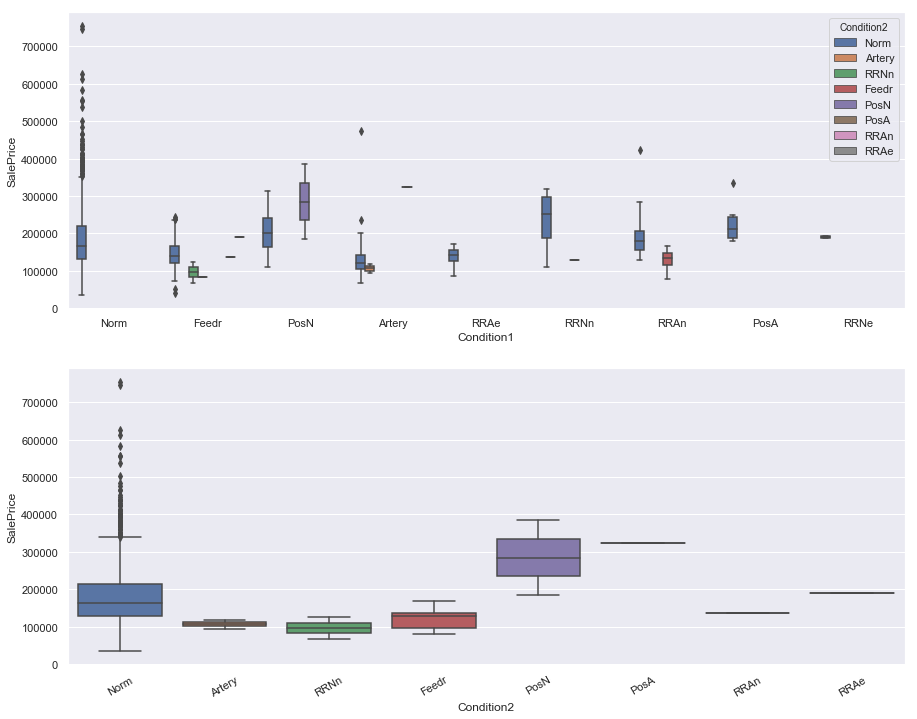

In [132]:
fig, ax = plt.subplots(2, 1, figsize = (15, 12))
sns.boxplot(x = 'Condition1', y = 'SalePrice', hue= 'Condition2',  data = df, ax = ax[0])
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = df, ax = ax[1])
#duplicate data with condition1 and 2 (unmelting)
x = plt.xticks(rotation = 30)
plt.show()

From the results this is clearly true! We can establish that having a positive off-site feature will directly influence sales price of that home. Lets combine these two into a grouped boxplot for side by side comparison:

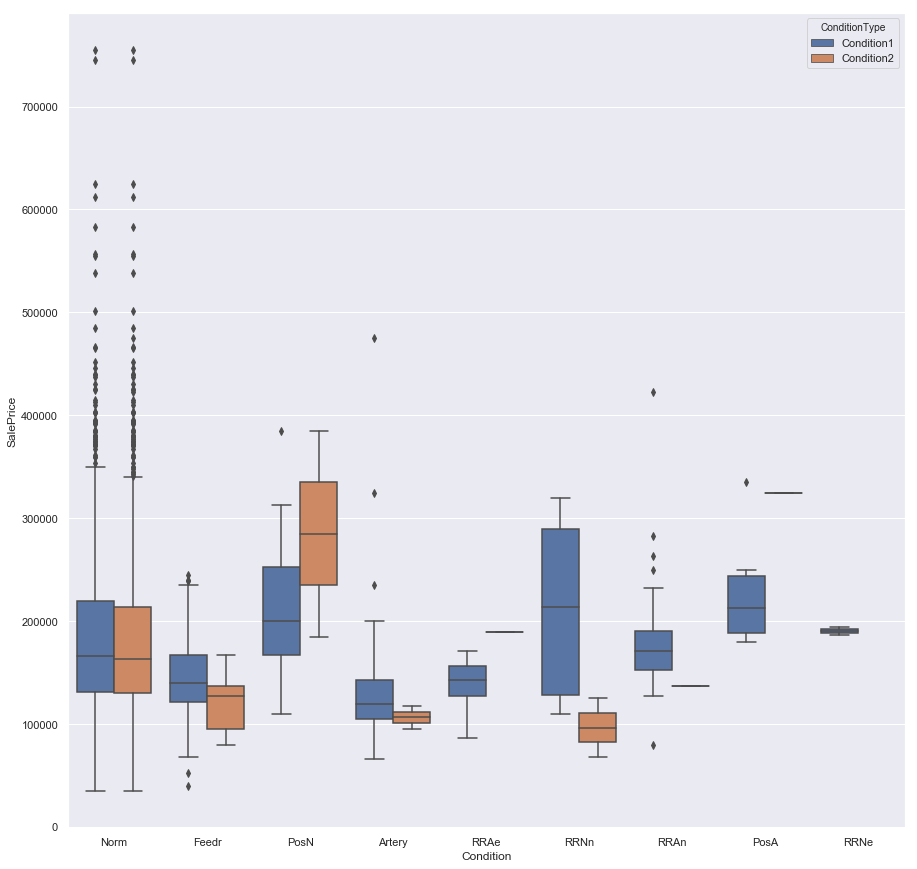

In [164]:
selected_data = df[['SalePrice', 'Condition1', 'Condition2']].set_index('SalePrice')
stacked_data = selected_data.stack()
stacked_data = stacked_data.reset_index()
stacked_data.columns = ['SalePrice', 'ConditionType', 'Condition']
stacked_data.head()


fig, ax = plt.subplots(figsize = (15, 15))
_ = sns.boxplot(x = 'Condition', y = 'SalePrice', hue= 'ConditionType',  data = stacked_data, ax = ax)


Lets take a look at kitchen quality denoted by the 'KitchenQual' variable:

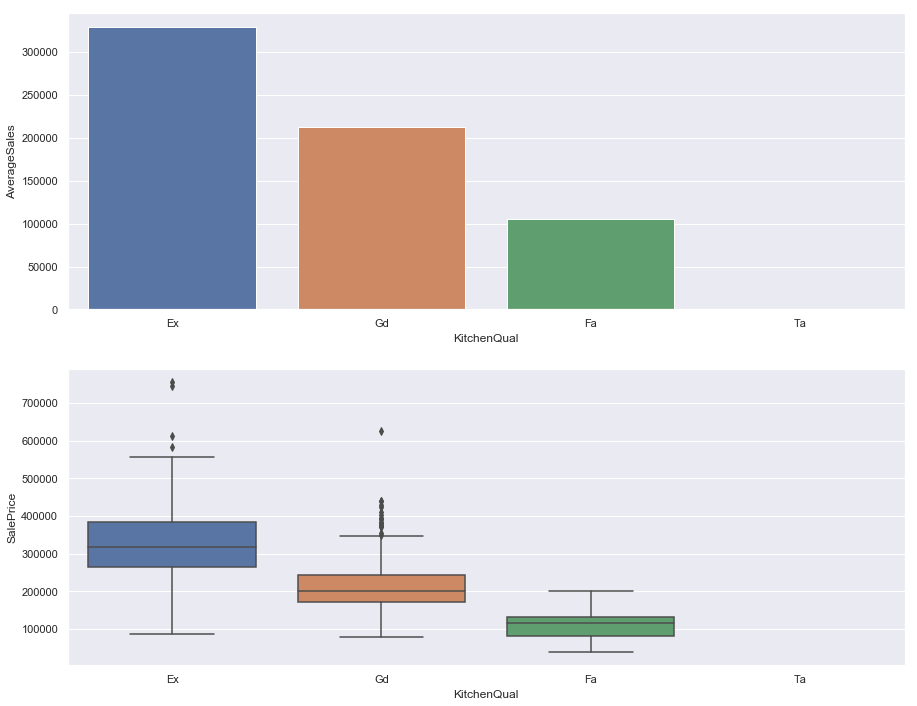

In [165]:
fig, ax = plt.subplots(2, 1, figsize = (15, 12))

df_kitchenQuality = df.groupby(['KitchenQual'])['SalePrice'].mean()
df_kitchenQuality = pd.DataFrame(df_kitchenQuality)
df_kitchenQuality = df_kitchenQuality.rename(columns={df_kitchenQuality.columns[0]:'AverageSales'})

_ = sns.barplot(df_kitchenQuality.index, df_kitchenQuality.AverageSales, data = df_kitchenQuality, ax=ax[0],  order =['Ex','Gd', 'Fa', 'Ta'])

_= sns.boxplot(df.KitchenQual, df.SalePrice, data=df, ax=ax[1], order =['Ex','Gd', 'Fa', 'Ta'])

There is a clear relationship here between quality of a kitchen and the sales price. Its fairly obvious from these visuals that kitchen quality matters a lot when it comes to the final sale price of a home.

Lets also examine the 'SaleCondition' feature. For this feature new homes are associated with the 'Partial' value. A hypothesis to test here would be that newer homes would fetch a higher sale price.

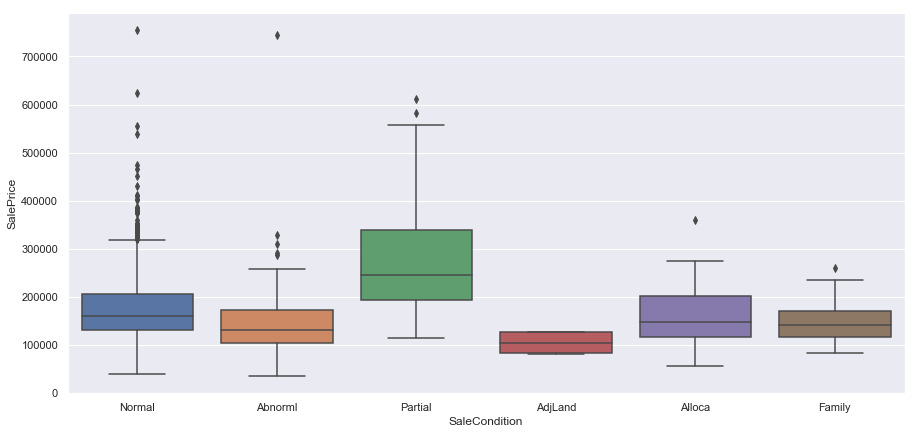

In [166]:
fig, ax = plt.subplots(figsize = (15, 7))
_ = sns.boxplot(x="SaleCondition", y="SalePrice", data=df, ax=ax)

Its pretty clear from the boxplots here that Abnorml sales will have a lower mean sale price while partial sales (or sales of newer homes) will rise significantly above the rest.

Lets check on the 'ExterCond' feature which determines the exterior condition of the home. Our assumption here is that excellent exterior condition will drive up sales price

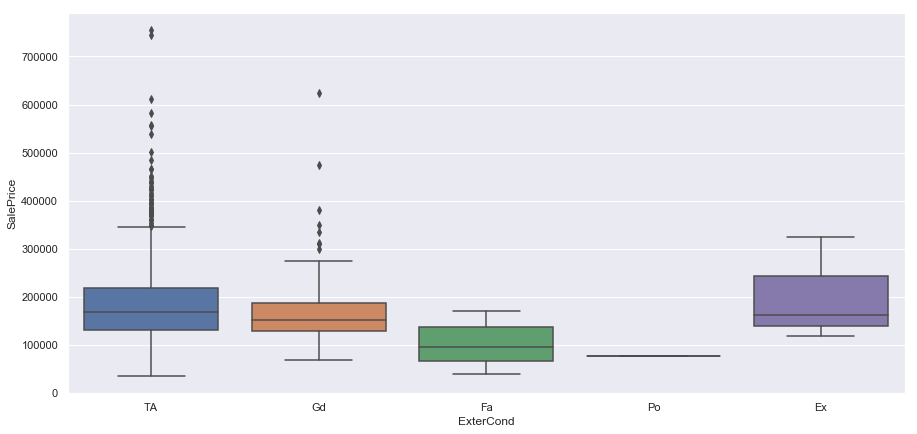

In [167]:
fig, ax = plt.subplots(figsize = (15, 7))
_ = sns.boxplot(x="ExterCond", y="SalePrice", data=df, ax=ax);

Looks like our assumption is somewhat validated byt his visualization. Seems like there is an observable difference betwen exccellent vs. poor condition exteriors

Since we are on the topic of exteriors, lets see if exterior material has anything to do with sale price. There are two variables which establish the exterior condition: 'Exterior1st' and 'Exterior2nd'

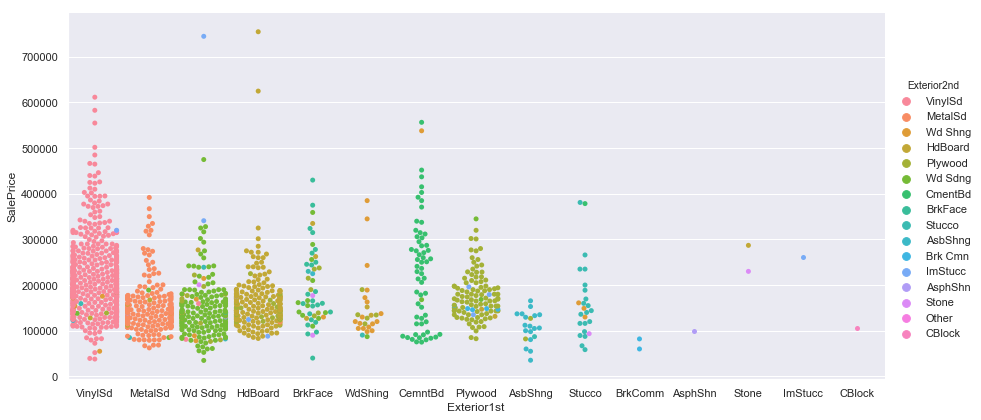

In [168]:
_ = sns.catplot(x="Exterior1st", y="SalePrice", data=df, kind="swarm", height=6, aspect=2.1, hue='Exterior2nd')

This is quite an interesting result. From the visual we can see that very rarely is there a secondary covering of different type than the initial covering.

In order to put some meaning on the MsubClass field (a field which establishes the type of dwelling), I think its useful to convert the integer values to their representative descriptions (provided in the data dictionary). In order to do this, we create a dictionary and convert these values using the pandas 'astype' function: 

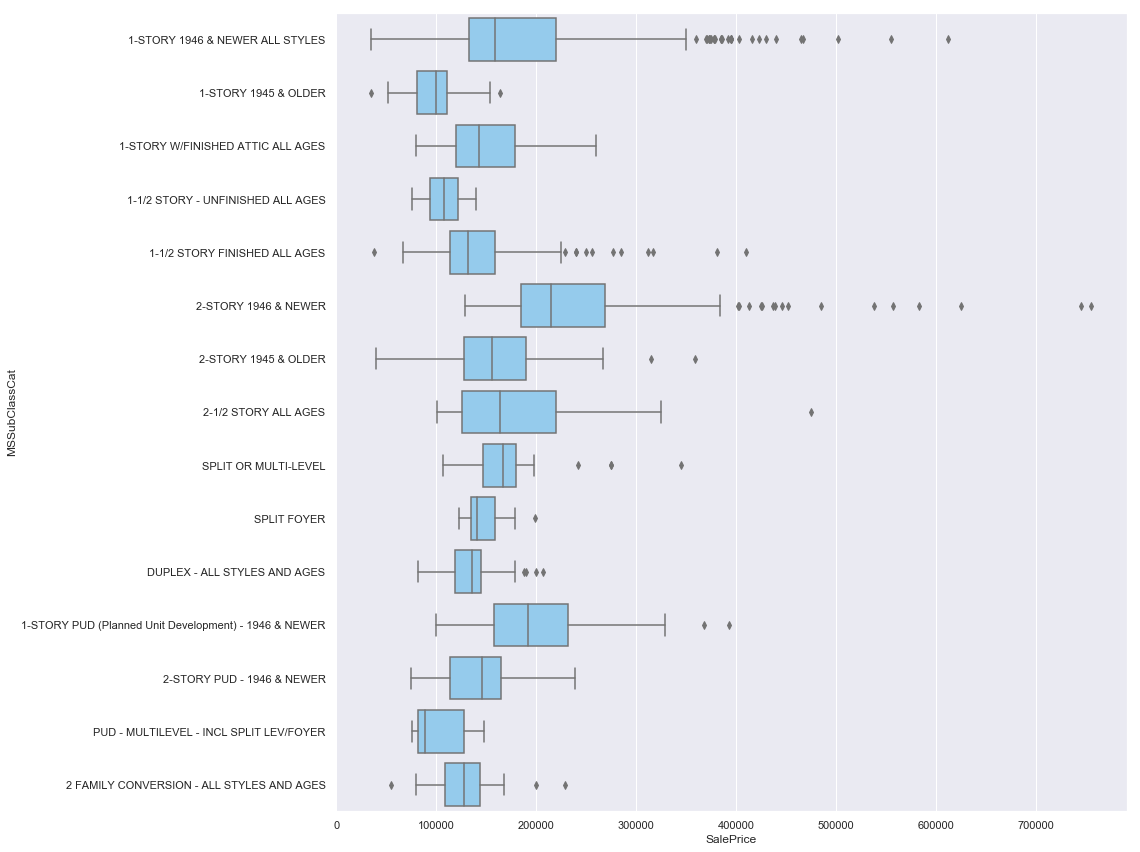

In [169]:
subClassDict = {
        20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'
}

MSSubClassCat = df['MSSubClass'].astype('category')

df['MSSubClassCat'] = MSSubClassCat.cat.rename_categories(subClassDict)
plt.figure(figsize=(16,12))
sns.boxplot(x='SalePrice', y='MSSubClassCat', data=df, orient='h', color='lightskyblue')
plt.tight_layout()

These results are quite interesting since we see a highly varying distribution of Sale Price with respect to the MSSubClass field. This indicates a strong corellation between MSSubClass and SalePrice. 

Lets plot the rest of the categorical features to make sure we havent missed any relevant features in our analysis:

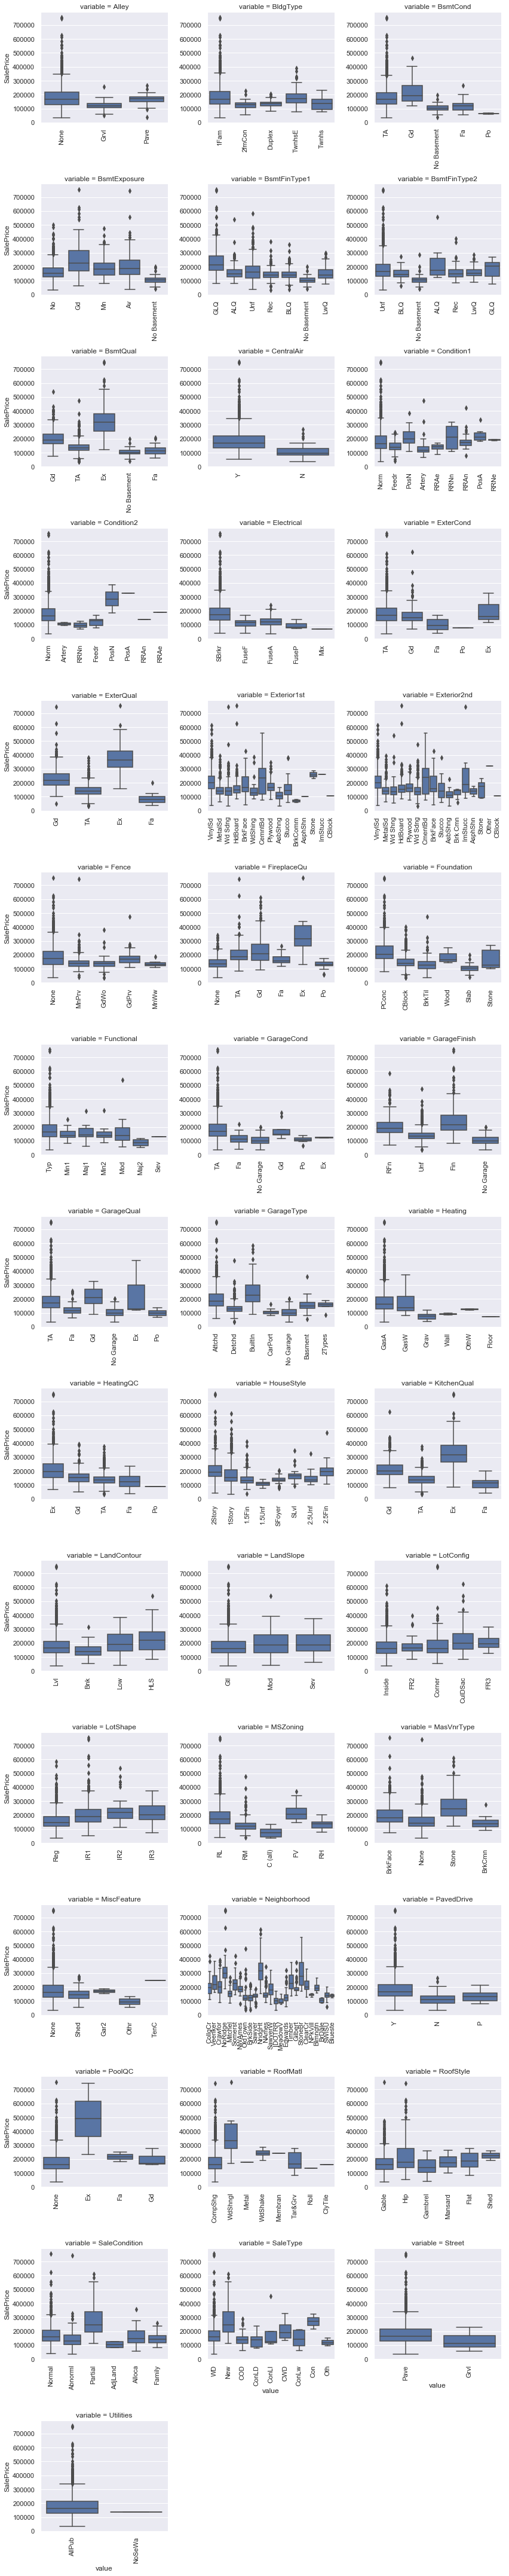

In [170]:
# Count plots of categorical features
categorical_features = list(df.select_dtypes(include=['object']).columns)

f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(categorical_features))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

Finally lets do the same for the numerical data, to make sure we havent missed anything significant:

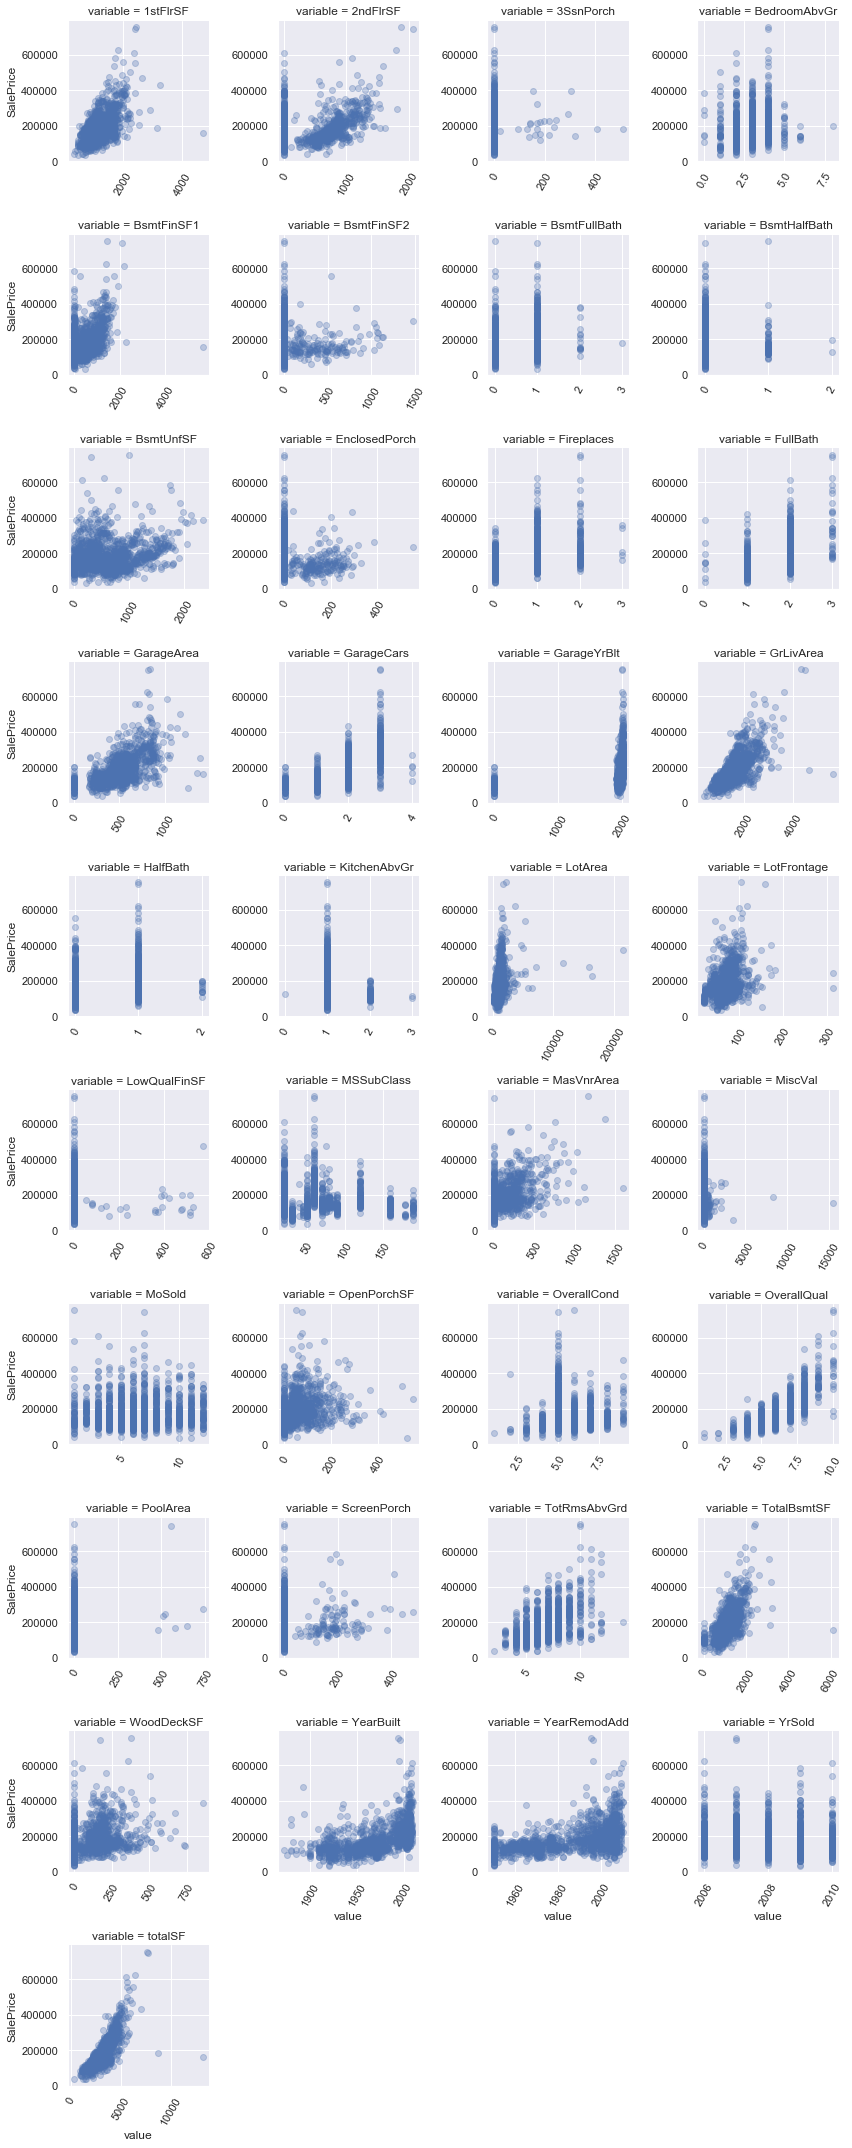

In [171]:
# Scatter plots of numerical features against SalePrice
numerical_features = df.select_dtypes(include=['int64','float64']).columns
numerical_features = numerical_features.drop(['Id','SalePrice']) # drop ID and SalePrice
numerical_features = list(numerical_features)


f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(numerical_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3}, fit_reg=False)
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

Some interesting take aways from this visual. We can see that very few homes have a pool so its tough to determine if pool area has any influence here. Also the number of bedrooms above ground, seems to correlate well with sale price (TotRmsAbovGnd). 

Also worth noting, WoodDeckSF seems to have a corellation with sale price. But we see that several homes were sold at a high price even without a wood deck. Perhaps a bit more feature engineering (such as adding this into the totalSF) would be worthwhile.  